<b>Mochammad Naufal Septifiandi</b><br>
<b><u>101319002</u></b>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Data Preprocessing

## Import Data

In [2]:
df = pd.read_csv('Chapter6_PVT Data.csv')
df

,Temperature,Rs,Gas Gravity,Oil API,Pbp
0,124.224811,983.507201,1.095773,27.378218,3094.473796
1,105.670201,1118.311927,1.264539,30.497141,2593.138497
2,220.984279,255.071907,0.840619,37.779038,1118.302194
3,244.728321,48.801731,1.109872,35.049613,232.011706
4,104.153879,75.385002,0.889540,24.543380,421.236666
...,...,...,...,...,...
244,104.019931,273.074402,0.830617,31.615851,1136.336659
245,153.868480,145.006939,0.855444,27.539107,783.000819
246,134.831647,91.510982,0.988292,31.875268,397.326261
247,199.504544,238.578634,0.963525,34.880735,940.892103


## Statistics

In [3]:
df.describe()

,Temperature,Rs,Gas Gravity,Oil API,Pbp
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,147.796271,411.145756,1.012870,31.658760,1424.602150
std,41.936641,291.829082,0.162192,5.036067,908.669973
min,70.447234,27.832416,0.797048,17.854225,131.484967
25%,116.365357,183.034832,0.885612,28.469070,697.772696
50%,142.257643,348.735793,0.978741,32.604282,1252.802615
75%,176.074354,587.055416,1.113760,35.875571,1937.635034
max,282.911419,1471.094081,1.632588,39.714096,4306.643567


## Null Value Check and Removal

In [4]:
df.isnull().values.any()

False

# 2. Modelling

## Train and Test Split

In [6]:
X = df[['Temperature', 'Rs', 'Gas Gravity', 'Oil API']]
X.head()

,Temperature,Rs,Gas Gravity,Oil API
0,124.224811,983.507201,1.095773,27.378218
1,105.670201,1118.311927,1.264539,30.497141
2,220.984279,255.071907,0.840619,37.779038
3,244.728321,48.801731,1.109872,35.049613
4,104.153879,75.385002,0.889540,24.543380


In [19]:
y = df['Pbp']
y.head()

0    3094.473796
1    2593.138497
2    1118.302194
3     232.011706
4     421.236666
Name: Pbp, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## MLP Modelling and Hyperparameter Tuning

In [22]:
from sklearn.neural_network import MLPRegressor

In [33]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {
    'hidden_layer_sizes': [
        (10, 10, 10),
        (20, 20, 20),
        (30, 30, 30),
        (40, 40, 40),
        (50, 50, 50),
        (60, 60, 60),
        (70, 70, 70),
        (80, 80, 80),
        (90, 90, 90),
        (100, 100, 100)
    ],
    'solver': ['adam', 'lbfgs']
}

model = MLPRegressor(
    hidden_layer_sizes=(10, 10, 10),
    activation='relu',
    solver='lbfgs',
    learning_rate_init=0.01)

search = GridSearchCV(model, param_grid, cv=5)
search.fit(X_train_scaled, y_train)

C:\Users\septi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\septi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\septi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\septi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

GridSearchCV(cv=5,
             estimator=MLPRegressor(hidden_layer_sizes=(10, 10, 10),
                                    learning_rate_init=0.01, solver='lbfgs'),
             param_grid={'hidden_layer_sizes': [(10, 10, 10), (20, 20, 20),
                                                (30, 30, 30), (40, 40, 40),
                                                (50, 50, 50), (60, 60, 60),
                                                (70, 70, 70), (80, 80, 80),
                                                (90, 90, 90), (100, 100, 100)],
                         'solver': ['adam', 'lbfgs']})

In [51]:
search.best_params_

{'hidden_layer_sizes': (10, 10, 10), 'solver': 'lbfgs'}

In [52]:
search.best_score_

0.9923474960826514

In [53]:
best_model = search.best_estimator_

# 3. Evaluation and Inspection

## Model Testing

In [55]:
best_model.fit(X_train_scaled, y_train)
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

C:\Users\septi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


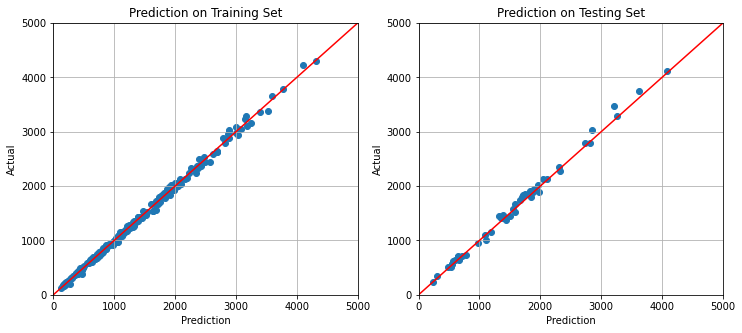

In [59]:
fig, [ax_1, ax_2] = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax_1.set_title('Prediction on Training Set')
ax_1.scatter(y_pred_train, y_train)
ax_1.set_xlim(0,5000)
ax_1.set_ylim(0,5000)
ax_1.set_xlabel('Prediction')
ax_1.set_ylabel('Actual')
ax_1.plot([0,5000], [0,5000], color='red')
ax_1.grid()

ax_2.set_title('Prediction on Testing Set')
ax_2.scatter(y_pred_test, y_test)
ax_2.set_xlim(0,5000)
ax_2.set_ylim(0,5000)
ax_2.set_xlabel('Prediction')
ax_2.set_ylabel('Actual')
ax_2.plot([0,5000], [0,5000], color='red')
ax_2.grid()

plt.show()

In [60]:
from sklearn import metrics
rmse = metrics.mean_squared_error(y_test, y_pred_test, squared=True)
r2 = metrics.r2_score(y_test, y_pred_test)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred_test)
print(f'RMSE Test: {rmse}')
print(f'R^2 Test: {r2}')
print(f'MAPE Test: {mape}')

RMSE Test: 5551.4867121311945
R^2 Test: 0.9933240733552378
MAPE Test: 0.04221153503363172


## Model Inspection: Permutation Feature Importance

In [65]:
from sklearn.inspection import permutation_importance

r = permutation_importance(best_model, 
                           X_test_scaled, 
                           y_test,
                           n_repeats=30)

for i in r.importances_mean.argsort()[::-1]:
      print(f'{X_train.columns[i]:<8}\t'
            f'{r.importances_mean[i]:.3f}'
            f' +/- {r.importances_std[i]:.3f}')

Rs      	1.676 +/- 0.220
Oil API 	0.127 +/- 0.038
Gas Gravity	0.103 +/- 0.028
Temperature	0.054 +/- 0.010


In [66]:
tree_feature_importances = r.importances_mean
sorted_idx = tree_feature_importances.argsort()

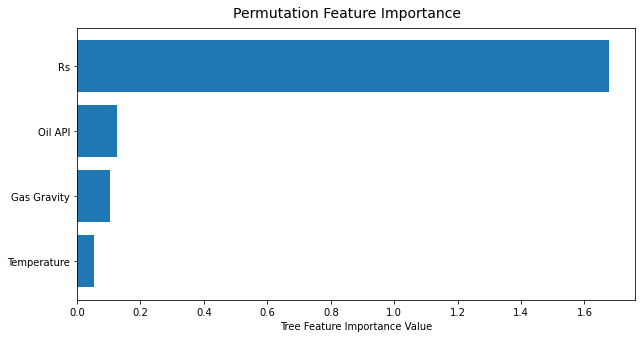

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Permutation Feature Importance', fontsize=14, y=0.94)
y_ticks = np.arange(0, len(X_train.columns))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(X_train.columns[sorted_idx])
ax.set_xlabel('Tree Feature Importance Value')
plt.show()